In [43]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler


train = pd.read_csv("C:\\Users\\FILMINVASION\\Downloads\\ML2024\\train_1.csv")


In [44]:
train.head(10)

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0
5,5566_zh.wikipedia.org_all-access_spider,12.0,7.0,4.0,5.0,20.0,8.0,5.0,17.0,24.0,...,16.0,27.0,8.0,17.0,32.0,19.0,23.0,17.0,17.0,50.0
6,91Days_zh.wikipedia.org_all-access_spider,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,7.0,33.0,8.0,11.0,4.0,15.0,6.0,8.0,6.0
7,A'N'D_zh.wikipedia.org_all-access_spider,118.0,26.0,30.0,24.0,29.0,127.0,53.0,37.0,20.0,...,64.0,35.0,35.0,28.0,20.0,23.0,32.0,39.0,32.0,17.0
8,AKB48_zh.wikipedia.org_all-access_spider,5.0,23.0,14.0,12.0,9.0,9.0,35.0,15.0,14.0,...,34.0,105.0,72.0,36.0,33.0,30.0,36.0,38.0,31.0,97.0
9,ASCII_zh.wikipedia.org_all-access_spider,6.0,3.0,5.0,12.0,6.0,5.0,4.0,13.0,9.0,...,25.0,17.0,22.0,29.0,30.0,29.0,35.0,44.0,26.0,41.0


In [45]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145063 entries, 0 to 145062
Columns: 551 entries, Page to 2016-12-31
dtypes: float64(550), object(1)
memory usage: 609.8+ MB


In [46]:
train["Page"].sample(10)

92646     Renos_navideños_es.wikipedia.org_all-access_al...
122032           椿隆之_ja.wikipedia.org_all-access_all-agents
41400     Spencer_Haywood_en.wikipedia.org_all-access_al...
42876     Special:Watchlist_www.mediawiki.org_desktop_al...
10896     1990_airlift_of_Indians_from_Kuwait_en.wikiped...
7694      Révolution_française_fr.wikipedia.org_desktop_...
116366    Billy_Burke_de.wikipedia.org_mobile-web_all-ag...
57939           三浦大知_ja.wikipedia.org_mobile-web_all-agents
69157      Gábor_Király_de.wikipedia.org_desktop_all-agents
137553       Ethanol_de.wikipedia.org_all-access_all-agents
Name: Page, dtype: object

In [47]:
train["total_views"] = train.iloc[:,2:].sum(axis=1)

top_articles = train.nlargest(1, "total_views")
top_articles

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31,total_views
38573,Main_Page_en.wikipedia.org_all-access_all-agents,20381245.0,20752194.0,19573967.0,20439645.0,20772109.0,22544669.0,21210887.0,19107911.0,19993848.0,...,22539246.0,25056620.0,25865746.0,28342885.0,26916991.0,27025053.0,26073819.0,24363967.0,26149541.0,1.204580e+10


1. Вікіпедії на яких мовах доступні в цьому датасеті?

In [48]:
def extract_country_code(url):
    match = re.search(r'_([a-z]{2})\.wikipedia\.org', url)
    if match:
        return match.group(1)
    return None

train['country_code'] = train['Page'].apply(extract_country_code)
train['language_code'] = train['country_code']
page_counts = train.groupby('country_code').size().reset_index(name='page_count')
print(page_counts)
train.head(3)

  country_code  page_count
0           de       18547
1           en       24108
2           es       14069
3           fr       17802
4           ja       20431
5           ru       15022
6           zh       17229


,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31,total_views,country_code,language_code
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,26.0,14.0,20.0,22.0,19.0,18.0,20.0,11948.0,zh,zh
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,15.0,9.0,30.0,52.0,45.0,26.0,20.0,13955.0,zh,zh
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,7.0,4.0,4.0,6.0,3.0,4.0,17.0,2861.0,zh,zh


2. Скільки сторінок французькою є на Вікіпедії у датасеті?

In [49]:
fr_page_count = page_counts[page_counts['country_code'] == 'fr']
print(fr_page_count)

  country_code  page_count
3           fr       17802


3. Вивести топ-3 статті для кожної мови за квітень 2016 року.

In [50]:
top3_train = train.melt(id_vars=['Page'], var_name='Date', value_name='Views')

# Convert 'Date' to datetime, handle errors
top3_train['Date'] = pd.to_datetime(top3_train['Date'], errors='coerce')

# Drop rows with invalid dates
top3_train = top3_train.dropna(subset=['Date'])

# Filter by date from 01/04/2016 (inclusive) to 01/05/2016 (exclusive)
start_date = '2016-04-01'
end_date = '2016-05-01'
filtered_train = top3_train[(top3_train['Date'] >= start_date) & (top3_train['Date'] < end_date)]

# Calculate total views for each page within the date range
total_views = filtered_train.groupby('Page')['Views'].sum().reset_index()

# Extract country code from the page URL
def extract_country_code(url):
    match = re.search(r'_([a-z]{2})\.wikipedia\.org', url)
    if match:
        return match.group(1)
    return None

total_views['country_code'] = total_views['Page'].apply(extract_country_code)

# Sort by the number of views
sorted_views = total_views.sort_values(by='Views', ascending=False)

# Group by 'country_code' and take top-3 pages from each group
top_pages_per_group = sorted_views.groupby('country_code').head(3)

# Print the result
print("Top Pages Per Group:\n", top_pages_per_group)

Top Pages Per Group:
                                                      Page        Views  \
58761    Main_Page_en.wikipedia.org_all-access_all-agents  516794194.0   
58763       Main_Page_en.wikipedia.org_desktop_all-agents  350117912.0   
58764    Main_Page_en.wikipedia.org_mobile-web_all-agents  162035332.0   
93891   Wikipedia:Hauptseite_de.wikipedia.org_all-acce...   88363668.0   
93894   Wikipedia:Hauptseite_de.wikipedia.org_mobile-w...   64100812.0   
94026   Wikipédia:Accueil_principal_fr.wikipedia.org_a...   48105801.0   
93904   Wikipedia:Portada_es.wikipedia.org_all-access_...   41410468.0   
100730  Заглавная_страница_ru.wikipedia.org_all-access...   38588419.0   
68262   Organisme_de_placement_collectif_en_valeurs_mo...   36567249.0   
68264   Organisme_de_placement_collectif_en_valeurs_mo...   36564493.0   
93907   Wikipedia:Portada_es.wikipedia.org_mobile-web_...   31690145.0   
93893   Wikipedia:Hauptseite_de.wikipedia.org_desktop_...   21860593.0   
100732  Заглавна

4. Знайти сторінку англійської вікіпедії з найбільшим середнім/медіаною/дисперсією за липень 2016 року.

In [51]:
train_en = train[train['language_code'] == 'en']
july_2016_columns = [col for col in train.columns if '2016-07' in col]
july_2016_data = train_en[['Page'] + july_2016_columns].copy()
july_2016_data['mean'] = july_2016_data[july_2016_columns].mean(axis=1)
july_2016_data['median'] = july_2016_data[july_2016_columns].median(axis=1)
july_2016_data['variance'] = july_2016_data[july_2016_columns].var(axis=1)

# Find the page with the highest value for each statistic
top_mean_page = july_2016_data.nlargest(1, 'mean')
top_median_page = july_2016_data.nlargest(1, 'median')
top_variance_page = july_2016_data.nlargest(1, 'variance')

# Display the results
print("Top page by mean views in July 2016:\n", top_mean_page[['Page', 'mean']])
print("\nTop page by median views in July 2016:\n", top_median_page[['Page', 'median']])
print("\nTop page by variance of views in July 2016:\n", top_variance_page[['Page', 'variance']])

Top page by mean views in July 2016:
                                                    Page          mean
38573  Main_Page_en.wikipedia.org_all-access_all-agents  3.470161e+07

Top page by median views in July 2016:
                                                    Page      median
38573  Main_Page_en.wikipedia.org_all-access_all-agents  20950175.0

Top page by variance of views in July 2016:
                                                Page      variance
9774  Main_Page_en.wikipedia.org_desktop_all-agents  4.304249e+14


5. Які статті отримали найбільший буст по переглядах за травень 2016 року в абсолютних показниках і відносних. Розглядати сторінки щонайменше з 1000 переглядами.

In [52]:
# Filter for the specific dates
filtered_train = train[['Page', '2016-05-01', '2016-05-31']]

# Filter pages that have less than 1000 views on 31/05/2016
filtered_train = filtered_train[filtered_train['2016-05-31'] >= 1000]

# Add columns for the absolute and relative differences
filtered_train['absolute_difference'] = filtered_train['2016-05-31'] - filtered_train['2016-05-01']
filtered_train['relative_difference'] = (filtered_train['2016-05-31'] - filtered_train['2016-05-01']) / filtered_train['2016-05-01']

# Show top-3 pages by absolute difference
top_absolute_diff = filtered_train.nlargest(3, 'absolute_difference')

# Show top-3 pages by relative difference
top_relative_diff = filtered_train.nlargest(3, 'relative_difference')

# Print the results
print("Top 3 Pages by Absolute Difference:\n", top_absolute_diff)
print("\nTop 3 Pages by Relative Difference:\n", top_relative_diff)

Top 3 Pages by Absolute Difference:
                                                      Page  2016-05-01  \
9774        Main_Page_en.wikipedia.org_desktop_all-agents  12622325.0   
38573    Main_Page_en.wikipedia.org_all-access_all-agents  18196421.0   
131296  Wikipédia:Accueil_principal_fr.wikipedia.org_a...     61673.0   

        2016-05-31  absolute_difference  relative_difference  
9774    13761231.0            1138906.0             0.090229  
38573   19027321.0             830900.0             0.045663  
131296    332277.0             270604.0             4.387722  

Top 3 Pages by Relative Difference:
                                                     Page  2016-05-01  \
76070  Rinku_Rajguru_en.wikipedia.org_mobile-web_all-...         0.0   
77466  Canelo_Álvarez_en.wikipedia.org_mobile-web_all...         0.0   
78557  File:Michael_Jackson_Reagan_Pete_Souza_1984.jp...         0.0   

       2016-05-31  absolute_difference  relative_difference  
76070      5830.0            

6. Візуалізувати кількість переглядів для топ-5 сторінок англійської Вікіпедії на одному графіку за перше півріччя 2016 року.

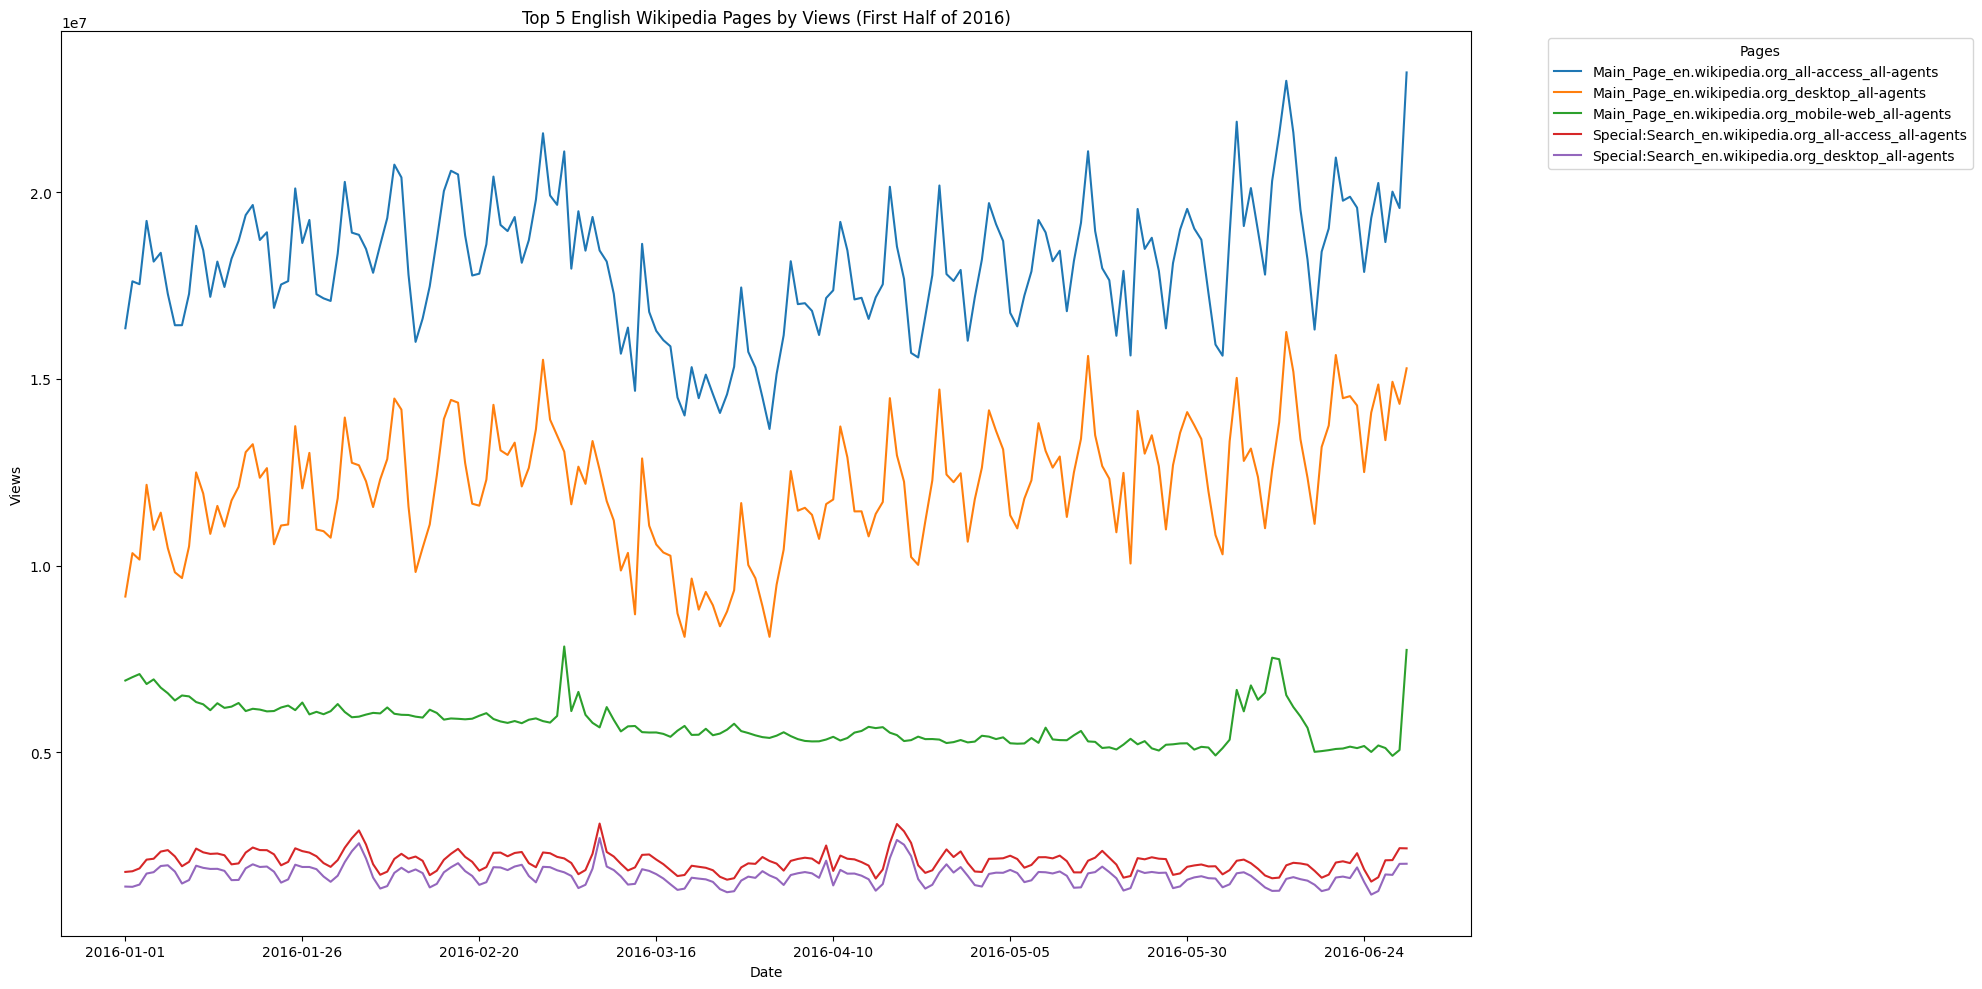

In [53]:
# Filter for the first half of 2016 (January to June)
first_half_columns = [col for col in train.columns if col.startswith('2016-01') or col.startswith('2016-02') or col.startswith('2016-03') or col.startswith('2016-04') or col.startswith('2016-05') or col.startswith('2016-06')]
filtered_train = train[['Page', 'language_code'] + first_half_columns]

# Filter for English pages only using the language_code column
filtered_train = filtered_train[filtered_train['language_code'] == 'en']

# Group by pages and sum all the views
grouped_views = filtered_train.groupby('Page')[first_half_columns].sum()

# Find the top-5 pages by total views
grouped_views['total_views'] = grouped_views.sum(axis=1)
top_5_pages = grouped_views.nlargest(5, 'total_views')

# Plot the top-5 pages
top_5_pages.drop(columns='total_views').transpose().plot(kind='line', figsize=(20, 10))
plt.title('Top 5 English Wikipedia Pages by Views (First Half of 2016)')
plt.xlabel('Date')
plt.ylabel('Views')
plt.legend(title='Pages', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

7. Порівняти розподіли німецьких і французьких сторінок вікіпедії за червень 2016 року.

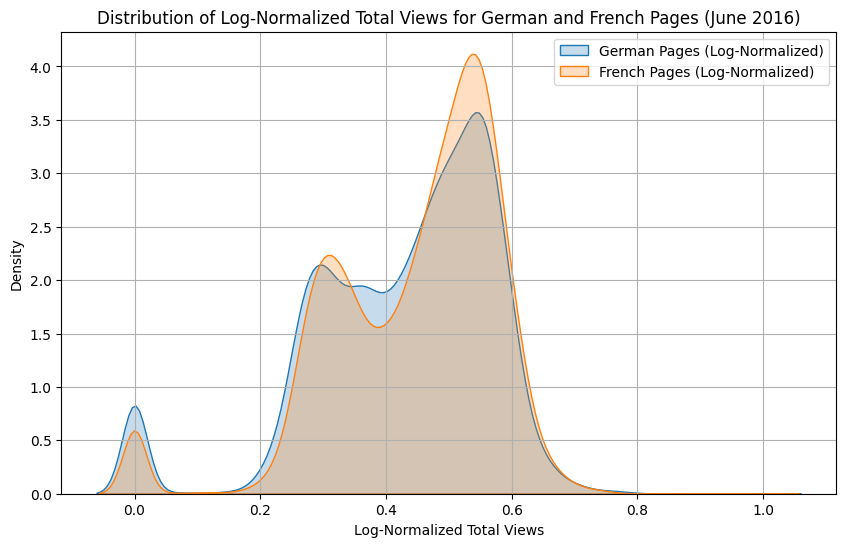

In [62]:
# Filter for the period of June 2016
june_columns = [col for col in train.columns if '2016-06' in col]
filtered_train = train[['Page', 'language_code'] + june_columns]

# Filter for German and French pages using the language_code column
filtered_train = filtered_train[filtered_train['language_code'].isin(['de', 'fr'])]

# Sum views by each page
filtered_train['total_views'] = filtered_train[june_columns].sum(axis=1)

# Apply a log transformation to the total views before normalization
filtered_train['log_total_views'] = np.log1p(filtered_train['total_views'])  # log1p handles log(0) safely

# Separate the data into German and French pages after log transformation
german_pages = filtered_train[filtered_train['language_code'] == 'de'].copy()
french_pages = filtered_train[filtered_train['language_code'] == 'fr'].copy()

# Normalize the log-transformed total views for both German and French pages
scaler = MinMaxScaler()
german_pages.loc[:, 'normalized_views'] = scaler.fit_transform(german_pages[['log_total_views']])
french_pages.loc[:, 'normalized_views'] = scaler.fit_transform(french_pages[['log_total_views']])

# Plot the normalized distributions using sns.kdeplot
plt.figure(figsize=(10, 6))
sns.kdeplot(german_pages['normalized_views'], label='German Pages (Log-Normalized)', fill=True)
sns.kdeplot(french_pages['normalized_views'], label='French Pages (Log-Normalized)', fill=True)
plt.title('Distribution of Log-Normalized Total Views for German and French Pages (June 2016)')
plt.xlabel('Log-Normalized Total Views')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()




8. Порівняти кількість переглядів для сторінок японської вікіпедії з розбивкою по днях тижня.

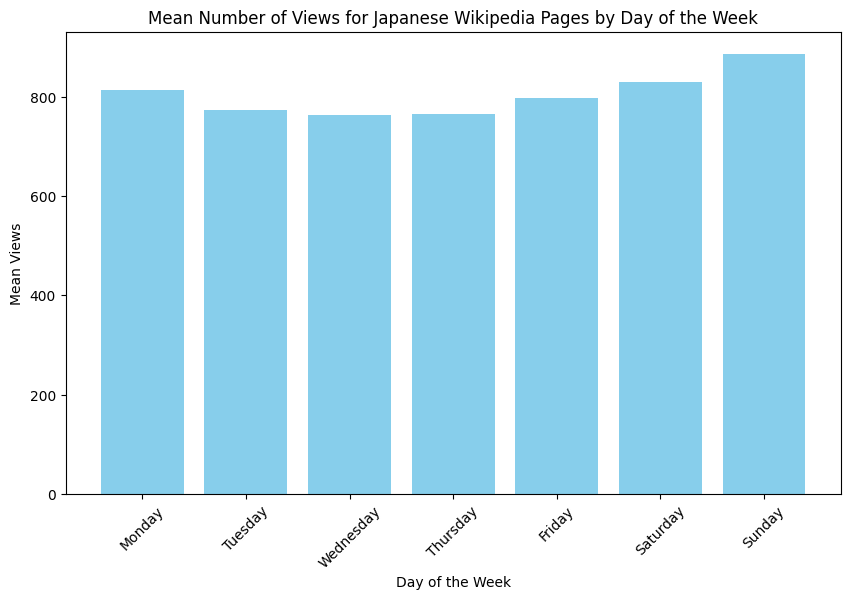

In [41]:
# Filter for Japanese pages only using the language_code column
jp_pages = train[train['language_code'] == 'ja']

# Extract the date columns
date_columns = [col for col in jp_pages.columns if col.startswith('20')]

# Melt the DataFrame to have a 'Date' and 'Views' columns
melted_jp_pages = jp_pages.melt(id_vars=['Page', 'language_code'], value_vars=date_columns, var_name='Date', value_name='Views')

# Convert 'Date' to datetime and extract the day of the week
melted_jp_pages['Date'] = pd.to_datetime(melted_jp_pages['Date'])
melted_jp_pages['Day_of_Week'] = melted_jp_pages['Date'].dt.day_name()

# Group by day of the week and calculate the mean number of views
mean_views_by_day = melted_jp_pages.groupby('Day_of_Week')['Views'].mean().reset_index()

# Order the days of the week
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
mean_views_by_day['Day_of_Week'] = pd.Categorical(mean_views_by_day['Day_of_Week'], categories=days_order, ordered=True)
mean_views_by_day = mean_views_by_day.sort_values('Day_of_Week')

# Plot the result
plt.figure(figsize=(10, 6))
plt.bar(mean_views_by_day['Day_of_Week'], mean_views_by_day['Views'], color='skyblue')
plt.title('Mean Number of Views for Japanese Wikipedia Pages by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Mean Views')
plt.xticks(rotation=45)
plt.show()